# Enoncé :

The 8-puzzle is a simplified version of the well-known 15-puzzle. It consists of a 3x3 grid where 8 numbered tiles (from 1 to 8) are placed, leaving one square empty. The empty square allows adjacent tiles
to slide into it, one at a time. The goal of the puzzle is to rearrange the tiles from a given initial configuration to a predefined target configuration by sliding the tiles across the grid.

In this exercise, we will work with the board positions shown in the figure below. The left side
illustrates an initial configuration, while the right side shows the target configuration that we aim to
achieve.


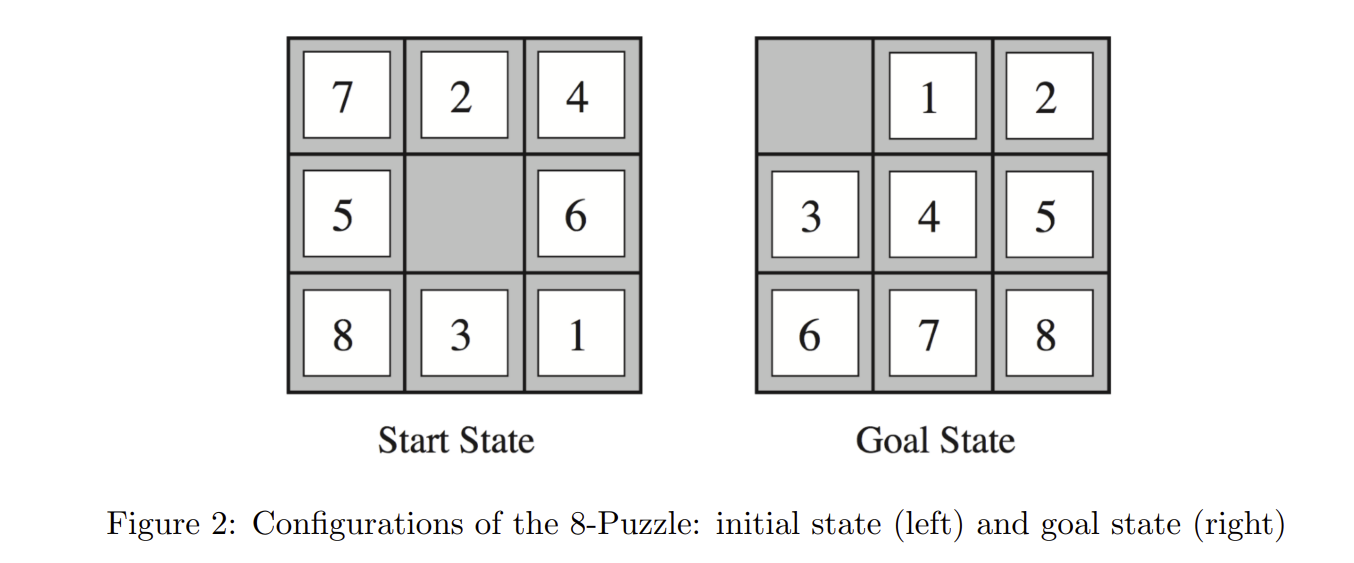

Your task is to solve the 8-puzzle problem by implementing various search algorithms, including Uniform Cost Search and A* Search with different heuristics. Afterward, you will compare and analyze the
performance of these algorithms based on their effectiveness.


# Exercices : 

## A)

In [1]:
import copy

class EightPuzzle:

    def __init__(self, initial_grid, goal_state):
        self.initial_grid = initial_grid
        self.goal_state = goal_state
        self.n = 3  # Grid size for a 3x3 puzzle

    def trouve_case_vide(self, grid):
        for i in range(self.n):
            for j in range(self.n):
                if grid[i][j] is None:
                    return i, j

    def modif_grid(self, grid, direction):

        direction = direction.lower()  # Just to make sure the direction is in lowercase to avoid errors in the if conditions

        i, j = self.trouve_case_vide(grid)

        new_grid = copy.deepcopy(grid)  # We copy the grid to avoid modifying the original (a deep copy was necessary because a shallow copy didn't work)

        if direction == 'up' and i > 0:  # We check if the empty space is not already at the top of the grid
            new_grid[i][j], new_grid[i-1][j] = new_grid[i-1][j], new_grid[i][j]

        elif direction == 'down' and i < self.n - 1:  # We check if the empty space is not already at the bottom of the grid
            new_grid[i][j], new_grid[i+1][j] = new_grid[i+1][j], new_grid[i][j]

        elif direction == 'left' and j > 0:  # We check if the empty space is not already on the left side of the grid
            new_grid[i][j], new_grid[i][j-1] = new_grid[i][j-1], new_grid[i][j]

        elif direction == 'right' and j < self.n - 1:  # We check if the empty space is not already on the right side of the grid
            new_grid[i][j], new_grid[i][j+1] = new_grid[i][j+1], new_grid[i][j]

        return new_grid

    def goal_test(self, grid):
        return grid == self.goal_state  # We check if the current grid is equal to the goal grid

    def voisins_possibles(self, grid):

        moves = []

        i, j = self.trouve_case_vide(grid)

        if i > 0:  # We check if the empty space is not already at the top of the grid
            moves.append('up')
        if i < self.n - 1:  # We check if the empty space is not already at the bottom of the grid
            moves.append('down')
        if j > 0:  # We check if the empty space is not already on the left side of the grid
            moves.append('left')
        if j < self.n - 1:  # We check if the empty space is not already on the right side of the grid
            moves.append('right')

        return moves

    def affichage(self, grid=None):

        if grid is None:
            grid = self.initial_grid  # By default, display the initial state

        for row in grid:
            print(' | '.join([' ' if v is None else str(v) for v in row]))
        print("\n" + "----------" + "\n")


In [2]:
initial_grid = [
    [7, 2, 4],
    [5, None, 6],
    [8, 3, 1]
]

goal_state = [
    [None, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]

puzzle = EightPuzzle(initial_grid, goal_state)
puzzle.affichage()  # Displays the initial grid

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------



### Define the problème

1) States : A state is defined by the position of the numbers on the grid. Each states is a matric 3x3 with all the numbers in a specific configuration.

2) Actions : The actions correspond to moving a number in one of the four directions : up, down, left, or right (within the limits of what the grid allows us to do and if the box where we want to move the number is the box with the nothing in it (None)).

3) Initial state : the initial state is the matrix :
[7, 2, 4]
[5, None, 6]
[8, 3, 1]

4) The goal is the matrix : 
[None, 1, 2]
[3, 4, 5]
[6, 7, 8]

## B)


In [17]:
import heapq

def uniform_cost_search(puzzle):
    
    frontier = []
    explored = set()

    # Use an index key to avoid direct comparison of grids
    heapq.heappush(frontier, (0, 0, puzzle.initial_grid, []))  # (cost, order of arrival, grid, path)
    order = 0
    
    while frontier:
        cost, _, current_grid, path = heapq.heappop(frontier)
        
        # If the goal state is reached, return the path and the cost
        if puzzle.goal_test(current_grid):
            return path, cost
        
        # Convert the current grid into a tuple of tuples to be stored in explored
        explored.add(tuple(map(tuple, current_grid)))
        
        # Loop over possible moves
        for move in puzzle.voisins_possibles(current_grid):
            new_grid = puzzle.modif_grid(current_grid, move)
            if tuple(map(tuple, new_grid)) not in explored:
                # Use a counter to enforce the order of arrival and avoid grid comparisons
                order += 1
                heapq.heappush(frontier, (cost + 1, order, new_grid, path + [move]))

    return None, None  # If no solution is found


In [18]:
initial_grid = [
    [7, 2, 4],
    [5, None, 6],
    [8, 3, 1]
]

goal_state = [
    [None, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]

puzzle = EightPuzzle(initial_grid, goal_state)

solution_path, solution_cost = uniform_cost_search(puzzle)  # Call the uniform_cost_search function

# Display the initial and final state
print("\nInitial state:")
puzzle.affichage(puzzle.initial_grid)

print("Goal state:")
puzzle.affichage(puzzle.goal_state)

# Display the solution steps
if solution_path is not None:
    print("*********************************************")
    print(f"Solution found in {solution_cost} steps.")
    print("*********************************************")
    print("\nPath of movements:", solution_path)
else:
    print("No solution found.")



Initial state:
7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

Goal state:
  | 1 | 2
3 | 4 | 5
6 | 7 | 8

----------

*********************************************
Solution found in 26 steps.
*********************************************

Path of movements: ['left', 'up', 'right', 'down', 'down', 'left', 'up', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'down', 'left', 'up', 'right', 'up', 'left', 'down', 'down', 'left', 'up', 'up']


In [19]:
def display_steps(solution_path): # Function to display the grids for each movement
    current_grid = initial_grid
    
    print("List of all grids for each movement:\n")
    puzzle.affichage(current_grid)

    for move in solution_path:
        print(f"   {move}")
        print("    |")
        print("    V\n")
        current_grid = puzzle.modif_grid(current_grid, move)
        puzzle.affichage(current_grid)

In [20]:
display_steps(solution_path)


List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   left
    |
    V

7 | 2 | 4
  | 5 | 6
8 | 3 | 1

----------

   up
    |
    V

  | 2 | 4
7 | 5 | 6
8 | 3 | 1

----------

   right
    |
    V

2 |   | 4
7 | 5 | 6
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 |   | 6
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 | 3 | 6
8 |   | 1

----------

   left
    |
    V

2 | 5 | 4
7 | 3 | 6
  | 8 | 1

----------

   up
    |
    V

2 | 5 | 4
  | 3 | 6
7 | 8 | 1

----------

   right
    |
    V

2 | 5 | 4
3 |   | 6
7 | 8 | 1

----------

   right
    |
    V

2 | 5 | 4
3 | 6 |  
7 | 8 | 1

----------

   up
    |
    V

2 | 5 |  
3 | 6 | 4
7 | 8 | 1

----------

   left
    |
    V

2 |   | 5
3 | 6 | 4
7 | 8 | 1

----------

   left
    |
    V

  | 2 | 5
3 | 6 | 4
7 | 8 | 1

----------

   down
    |
    V

3 | 2 | 5
  | 6 | 4
7 | 8 | 1

----------

   right
    |
    V

3 | 2 | 5
6 |   | 4
7 | 8 | 1

----------

   right
    |
    V

3 |

### C)

misplaced_tiles calculates the number of tiles that are not in their correct position.

In [6]:
def misplaced_tiles(grid, goal):
    count = 0
    for i in range(3):
        for j in range(3):
            if grid[i][j] is not None and grid[i][j] != goal[i][j]:
                count += 1
    return count  # Always returns a number, never None


In [7]:
print("Misplaced Tiles Heuristic:", misplaced_tiles(initial_grid, goal_state))

Misplaced Tiles Heuristic: 8


The Manhattan distance is the sum of the horizontal and vertical distances needed to move each tile to its correct position.

In [8]:
def manhattan_distance(grid, goal):
    distance = 0
    for i in range(3):
        for j in range(3):
            if grid[i][j] is not None:
                # Find the coordinates of the current tile in the goal state
                goal_coords = [(x, y) for x, row in enumerate(goal) for y, val in enumerate(row) if val == grid[i][j]]
                if goal_coords:
                    x_goal, y_goal = goal_coords[0]
                    distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


In [9]:
print("Manhattan Distance Heuristic:", manhattan_distance(initial_grid, goal_state))

Manhattan Distance Heuristic: 18



## D)


Best-First Search algorithm using a specified heuristic.
    Explores the most promising paths first based only on the heuristic value.

In [10]:

class PrioritizedItem: # Class to wrap grid states and ensure comparison is based only on priority

    def __init__(self, priority, grid, path):
        self.priority = priority  # Heuristic value
        self.grid = grid  
        self.path = path  # Path leading to the current state

    def __lt__(self, other):
        return self.priority < other.priority  # Comparison only on priority



def best_first_search(puzzle, heuristic):
    
    frontier = []  # Priority queue to store the frontier states
    explored = set()  # Set to store explored states

    # Calculate initial heuristic for the starting grid
    initial_heuristic_value = heuristic(puzzle.initial_grid, puzzle.goal_state)
    heapq.heappush(frontier, PrioritizedItem(initial_heuristic_value, puzzle.initial_grid, []))

    # Main loop to explore the frontier
    while frontier:
        current_item = heapq.heappop(frontier)
        current_grid = current_item.grid
        path = current_item.path

        if puzzle.goal_test(current_grid):
            return path

        explored.add(tuple(map(tuple, current_grid)))

        # Explore neighboring grids
        for move in puzzle.voisins_possibles(current_grid):
            new_grid = puzzle.modif_grid(current_grid, move)
            if tuple(map(tuple, new_grid)) not in explored:
                heuristic_value = heuristic(new_grid, puzzle.goal_state)
                heapq.heappush(frontier, PrioritizedItem(heuristic_value, new_grid, path + [move]))

    return None  


In [11]:
puzzle = EightPuzzle(initial_grid, goal_state)

# Testing the function Best-First Search avec h1 (misplaced tiles)
path_h1 = best_first_search(puzzle, misplaced_tiles)
if path_h1 is not None:
    print("*********************************************")
    print(f"Solution found in {len(path_h1)} steps.")
    print("*********************************************")
    print("Best-First Search with h1 (Misplaced Tiles) path:", path_h1)
else:
    print("No solution found.")

print("\n\n")


# Testing the function Best-First Search avec h2 (Manhattan distance)
path_h2 = best_first_search(puzzle, manhattan_distance)
if path_h2 is not None:
    print("*********************************************")
    print(f"Solution found in {len(path_h2)} steps.")
    print("*********************************************")
    print("Best-First Search with h2 (Manhattan Distance) path:", path_h2)
else:
    print("No solution found.")


*********************************************
Solution found in 80 steps.
*********************************************
Best-First Search with h1 (Misplaced Tiles) path: ['right', 'up', 'left', 'left', 'down', 'right', 'right', 'down', 'left', 'left', 'up', 'right', 'right', 'down', 'left', 'up', 'left', 'up', 'right', 'down', 'left', 'up', 'right', 'down', 'down', 'left', 'up', 'up', 'right', 'down', 'left', 'down', 'right', 'up', 'left', 'up', 'right', 'down', 'left', 'up', 'right', 'down', 'down', 'left', 'up', 'up', 'right', 'down', 'left', 'down', 'right', 'up', 'up', 'left', 'down', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'up', 'right', 'down', 'left', 'left', 'up', 'right', 'down', 'right', 'up', 'left', 'left']



*********************************************
Solution found in 58 steps.
*********************************************
Best-First Search with h2 (Manhattan Distance) path: ['down', 'right', 'up', 'up', 

### Comparison Between BFS with h1 and h2

When comparing both heuristics using BFS, we can observe differences in performance. While h1 can generate more moves and explore more nodes, h2 tends to find the solution faster as it guides the search in a more optimal direction.

In our case, BFS with h2 is generally expected to be more efficient than with h1 because it better represents the problem's true cost structure. We have a goal reached with 58 steps for h2 and 80 steps for h1, so the Manhattan Distance is clearly the best solution

In [21]:
display_steps(path_h1)  # Display the steps for the path found with h1

List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   right
    |
    V

7 | 2 | 4
5 | 6 |  
8 | 3 | 1

----------

   up
    |
    V

7 | 2 |  
5 | 6 | 4
8 | 3 | 1

----------

   left
    |
    V

7 |   | 2
5 | 6 | 4
8 | 3 | 1

----------

   left
    |
    V

  | 7 | 2
5 | 6 | 4
8 | 3 | 1

----------

   down
    |
    V

5 | 7 | 2
  | 6 | 4
8 | 3 | 1

----------

   right
    |
    V

5 | 7 | 2
6 |   | 4
8 | 3 | 1

----------

   right
    |
    V

5 | 7 | 2
6 | 4 |  
8 | 3 | 1

----------

   down
    |
    V

5 | 7 | 2
6 | 4 | 1
8 | 3 |  

----------

   left
    |
    V

5 | 7 | 2
6 | 4 | 1
8 |   | 3

----------

   left
    |
    V

5 | 7 | 2
6 | 4 | 1
  | 8 | 3

----------

   up
    |
    V

5 | 7 | 2
  | 4 | 1
6 | 8 | 3

----------

   right
    |
    V

5 | 7 | 2
4 |   | 1
6 | 8 | 3

----------

   right
    |
    V

5 | 7 | 2
4 | 1 |  
6 | 8 | 3

----------

   down
    |
    V

5 | 7 | 2
4 | 1 | 3
6 | 8 |  

----------

   left
    |
    V

5

In [22]:
display_steps(path_h2)  # Display the steps for the path found with h2

List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   down
    |
    V

7 | 2 | 4
5 | 3 | 6
8 |   | 1

----------

   right
    |
    V

7 | 2 | 4
5 | 3 | 6
8 | 1 |  

----------

   up
    |
    V

7 | 2 | 4
5 | 3 |  
8 | 1 | 6

----------

   up
    |
    V

7 | 2 |  
5 | 3 | 4
8 | 1 | 6

----------

   left
    |
    V

7 |   | 2
5 | 3 | 4
8 | 1 | 6

----------

   left
    |
    V

  | 7 | 2
5 | 3 | 4
8 | 1 | 6

----------

   down
    |
    V

5 | 7 | 2
  | 3 | 4
8 | 1 | 6

----------

   right
    |
    V

5 | 7 | 2
3 |   | 4
8 | 1 | 6

----------

   down
    |
    V

5 | 7 | 2
3 | 1 | 4
8 |   | 6

----------

   left
    |
    V

5 | 7 | 2
3 | 1 | 4
  | 8 | 6

----------

   up
    |
    V

5 | 7 | 2
  | 1 | 4
3 | 8 | 6

----------

   up
    |
    V

  | 7 | 2
5 | 1 | 4
3 | 8 | 6

----------

   right
    |
    V

7 |   | 2
5 | 1 | 4
3 | 8 | 6

----------

   down
    |
    V

7 | 1 | 2
5 |   | 4
3 | 8 | 6

----------

   left
    |
    V

7 | 1 |

### E)

In [12]:
def h3(grid, goal):
    row_count = 0
    col_count = 0
    
    for i in range(3):
        for j in range(3):
            if grid[i][j] is not None:
                # Find the position of the tile in the goal state
                x_goal, y_goal = [(ix, iy) for ix, row in enumerate(goal) for iy, val in enumerate(row) if val == grid[i][j]][0]
                
                # Check if the tile is in the wrong row
                if i != x_goal:
                    row_count += 1
                
                # Check if the tile is in the wrong column
                if j != y_goal:
                    col_count += 1
    
    return row_count + col_count


In [13]:
print("Heuristic h3 (Row + Column mismatch):", h3(initial_grid, goal_state))

Heuristic h3 (Row + Column mismatch): 13


In [14]:
# Testing the function Best-First Search avec h2 (Manhattan distance)
path_h3 = best_first_search(puzzle, h3)
if path_h3 is not None:
    print("*********************************************")
    print(f"Solution found in {len(path_h3)} steps.")
    print("*********************************************")
    print("Best-First Search with heuristic 3 path:", path_h3)
else:
    print("No solution found.")


*********************************************
Solution found in 92 steps.
*********************************************
Best-First Search with heuristic 3 path: ['down', 'right', 'up', 'up', 'left', 'left', 'down', 'right', 'down', 'left', 'up', 'up', 'right', 'down', 'left', 'down', 'right', 'right', 'up', 'left', 'down', 'left', 'up', 'right', 'right', 'down', 'left', 'left', 'up', 'right', 'down', 'left', 'up', 'right', 'up', 'left', 'down', 'down', 'right', 'up', 'left', 'up', 'right', 'down', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'up', 'left', 'down', 'left', 'up', 'right', 'right', 'down', 'left', 'up', 'left', 'down', 'right', 'right', 'up', 'left', 'down', 'down', 'left', 'up', 'up', 'right', 'down', 'down', 'left', 'up', 'up', 'right', 'down', 'left', 'down', 'right', 'up', 'up', 'left', 'down', 'right', 'down', 'left', 'up', 'up']



## Admissibility of Heuristic h3

The heuristic h3 is admissible because it never overestimates the cost to reach the goal. It simply counts how many tiles are out of place in their rows and columns, which is a lower bound on the number of moves required to arrange them correctly. Thus, the actual cost will always be greater than or equal to h3, making it admissible.

## Comparison with h1 and h2

We found the goal in 92 steps with the heuristic 3, it is more than with the Misplaced Tiles or the Manhattan Distance so the heuristic 3 seems less effective than the heuristic 1 and 2

1. **h1 (Misplaced Tiles)**: This heuristic counts the number of tiles that are in the wrong position, but does not consider how far they are from the correct position. It is simpler but less informative, however it gives a better score (less steps to reach the goal) than the heuristic 3 but not with a big difference.
2. **h2 (Manhattan Distance)**: This heuristic calculates the total number of moves required to bring each tile to its correct position, making it more accurate than h1 and more informative than h3. That's why it is the better heuristic in this 3.




In [23]:
display_steps(path_h3)  # Display the steps for the path found with h3

List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   down
    |
    V

7 | 2 | 4
5 | 3 | 6
8 |   | 1

----------

   right
    |
    V

7 | 2 | 4
5 | 3 | 6
8 | 1 |  

----------

   up
    |
    V

7 | 2 | 4
5 | 3 |  
8 | 1 | 6

----------

   up
    |
    V

7 | 2 |  
5 | 3 | 4
8 | 1 | 6

----------

   left
    |
    V

7 |   | 2
5 | 3 | 4
8 | 1 | 6

----------

   left
    |
    V

  | 7 | 2
5 | 3 | 4
8 | 1 | 6

----------

   down
    |
    V

5 | 7 | 2
  | 3 | 4
8 | 1 | 6

----------

   right
    |
    V

5 | 7 | 2
3 |   | 4
8 | 1 | 6

----------

   down
    |
    V

5 | 7 | 2
3 | 1 | 4
8 |   | 6

----------

   left
    |
    V

5 | 7 | 2
3 | 1 | 4
  | 8 | 6

----------

   up
    |
    V

5 | 7 | 2
  | 1 | 4
3 | 8 | 6

----------

   up
    |
    V

  | 7 | 2
5 | 1 | 4
3 | 8 | 6

----------

   right
    |
    V

7 |   | 2
5 | 1 | 4
3 | 8 | 6

----------

   down
    |
    V

7 | 1 | 2
5 |   | 4
3 | 8 | 6

----------

   left
    |
    V

7 | 1 |


## F)

A* Search algorithm using the specified heuristic.
Combines the actual path cost (g) and the heuristic (h) to explore the most promising paths.

In [15]:
def a_star_search(puzzle, heuristic):
    frontier = []  # Priority queue to store the frontier states
    explored = set()  # Set to store explored states

    # Calculate initial heuristic for the starting grid
    initial_heuristic_value = heuristic(puzzle.initial_grid, puzzle.goal_state)
    heapq.heappush(frontier, PrioritizedItem(initial_heuristic_value, puzzle.initial_grid, []))

    # Main loop to explore the frontier
    while frontier:
        current_item = heapq.heappop(frontier)
        current_grid = current_item.grid
        path = current_item.path
        
        if puzzle.goal_test(current_grid): 
            return path

        explored.add(tuple(map(tuple, current_grid)))

        # Explore neighboring grids
        for move in puzzle.voisins_possibles(current_grid):
            new_grid = puzzle.modif_grid(current_grid, move)
            if tuple(map(tuple, new_grid)) not in explored:
                cost = len(path) + 1  # Actual path cost (g(n))
                heuristic_value = heuristic(new_grid, puzzle.goal_state)
                total_cost = cost + heuristic_value  # f(n) = g(n) + h(n)
                heapq.heappush(frontier, PrioritizedItem(total_cost, new_grid, path + [move]))

    return None  


In [16]:
# Testing the function A* Search avec h1 (misplaced tiles)
path_a_star_h1 = a_star_search(puzzle, misplaced_tiles)
if path_a_star_h1 is not None:
    print("*********************************************")
    print(f"Solution found in {len(path_a_star_h1)} steps.")
    print("*********************************************")
    print("A* Search with h1 (Misplaced Tiles) path:", path_a_star_h1)
else:
    print("No solution found.")

print("\n\n")

# Testing the function A* Search avec h2 (Manhattan distance)
path_a_star_h2 = a_star_search(puzzle, manhattan_distance)
if path_a_star_h2 is not None:
    print("*********************************************")
    print(f"Solution found in {len(path_a_star_h2)} steps.")
    print("*********************************************")
    print("A* Search with h2 (Manhattan Distance) path:", path_a_star_h2)
else:
    print("No solution found.")

*********************************************
Solution found in 26 steps.
*********************************************
A* Search with h1 (Misplaced Tiles) path: ['left', 'up', 'right', 'down', 'right', 'down', 'left', 'left', 'up', 'right', 'right', 'down', 'left', 'left', 'up', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'up', 'left', 'left']



*********************************************
Solution found in 26 steps.
*********************************************
A* Search with h2 (Manhattan Distance) path: ['left', 'up', 'right', 'down', 'down', 'left', 'up', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'down', 'left', 'up', 'right', 'up', 'left', 'down', 'down', 'left', 'up', 'up']


### Comparison Between A* with h1 and h2

From the results, we notice that both heuristics produce valid solutions with the same number of steps (but the path is not the same), however **h2 is generally preferred** for solving the 8-puzzle problem as it guides the algorithm more efficiently towards the goal.


In [24]:
display_steps(path_a_star_h1)  # Display the steps for the path found with h1

List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   left
    |
    V

7 | 2 | 4
  | 5 | 6
8 | 3 | 1

----------

   up
    |
    V

  | 2 | 4
7 | 5 | 6
8 | 3 | 1

----------

   right
    |
    V

2 |   | 4
7 | 5 | 6
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 |   | 6
8 | 3 | 1

----------

   right
    |
    V

2 | 5 | 4
7 | 6 |  
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 | 6 | 1
8 | 3 |  

----------

   left
    |
    V

2 | 5 | 4
7 | 6 | 1
8 |   | 3

----------

   left
    |
    V

2 | 5 | 4
7 | 6 | 1
  | 8 | 3

----------

   up
    |
    V

2 | 5 | 4
  | 6 | 1
7 | 8 | 3

----------

   right
    |
    V

2 | 5 | 4
6 |   | 1
7 | 8 | 3

----------

   right
    |
    V

2 | 5 | 4
6 | 1 |  
7 | 8 | 3

----------

   down
    |
    V

2 | 5 | 4
6 | 1 | 3
7 | 8 |  

----------

   left
    |
    V

2 | 5 | 4
6 | 1 | 3
7 |   | 8

----------

   left
    |
    V

2 | 5 | 4
6 | 1 | 3
  | 7 | 8

----------

   up
    |
    V

2 | 

In [25]:
display_steps(path_a_star_h2)  # Display the steps for the path found with h1

List of all grids for each movement:

7 | 2 | 4
5 |   | 6
8 | 3 | 1

----------

   left
    |
    V

7 | 2 | 4
  | 5 | 6
8 | 3 | 1

----------

   up
    |
    V

  | 2 | 4
7 | 5 | 6
8 | 3 | 1

----------

   right
    |
    V

2 |   | 4
7 | 5 | 6
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 |   | 6
8 | 3 | 1

----------

   down
    |
    V

2 | 5 | 4
7 | 3 | 6
8 |   | 1

----------

   left
    |
    V

2 | 5 | 4
7 | 3 | 6
  | 8 | 1

----------

   up
    |
    V

2 | 5 | 4
  | 3 | 6
7 | 8 | 1

----------

   right
    |
    V

2 | 5 | 4
3 |   | 6
7 | 8 | 1

----------

   right
    |
    V

2 | 5 | 4
3 | 6 |  
7 | 8 | 1

----------

   up
    |
    V

2 | 5 |  
3 | 6 | 4
7 | 8 | 1

----------

   left
    |
    V

2 |   | 5
3 | 6 | 4
7 | 8 | 1

----------

   left
    |
    V

  | 2 | 5
3 | 6 | 4
7 | 8 | 1

----------

   down
    |
    V

3 | 2 | 5
  | 6 | 4
7 | 8 | 1

----------

   right
    |
    V

3 | 2 | 5
6 |   | 4
7 | 8 | 1

----------

   right
    |
    V

3 |


## G) Comparing Uniform Cost Search and A* Search

### Performance:
- **Uniform Cost Search (UCS)** explores nodes based solely on the cost to reach them, without any heuristic guidance. It guarantees finding the least-cost solution but can be very slow **(has we saw with the first search that took 13 sec to run)**, especially in large search spaces, since it treats all nodes equally in terms of cost, leading to exhaustive exploration.
  
- **A star Search**, on the other hand, combines both the cost to reach a node and a heuristic estimate of the remaining cost to the goal. This makes A* more efficient than UCS, as it can avoid exploring unnecessary nodes and focus on the most promising paths. We could see the fact that A* is much faster than UCS, it took nearly a second to make it run.

### Solution Optimality:
- Both UCS and A* are guaranteed to find the optimal solution if the cost function is consistent (as in this case). However, A* with an admissible heuristic (like h1 or h2) typically finds the solution faster, as it uses the heuristic to guide the search towards the goal.

In conclusion, while both algorithms are optimal, A* is generally more efficient in terms of performance because it can leverage heuristics to reduce the search space. UCS may be preferable only when no suitable heuristic is available, or when the cost function is unknown.
